In [78]:
pip install -U fortran-magic

In [62]:
%matplotlib inline
%reload_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [63]:
assert ran_the_first_cell, "Oh noes!"

In [64]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [65]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [66]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [67]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [68]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [69]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [70]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [71]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [72]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [73]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [2]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [3]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [4]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [5]:
# No slicing.
for key in philosophers:
    if 'Bertrand' <= key <= 'Immanuel':
        print(philosophers[key])

Kant
Russell


## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [6]:
4 * "a"

'aaaa'

In [7]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [8]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [9]:
%%time

matmul(a, b)

CPU times: user 34 µs, sys: 5 µs, total: 39 µs
Wall time: 43.9 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.150
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4400.30
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [24]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):  # Change here
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [25]:
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

matmul(a, b)

IndexError: list index out of range

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [28]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""

    if len(A[0]) != len(B):
        raise ValueError("Matrices no se pueden multiplicar")

    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [29]:
matmul(a, b)

ValueError: Matrices no se pueden multiplicar

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [30]:
a = [[2, 0, 1],
     [3, 0, 0],
     [5, 1, 1]]

b = [[1, 0, 1],
     [1, 2, 1],
     [1, 1, 0]]


matmul(a, b)

[[3, 1, 2], [3, 0, 3], [7, 3, 6]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [14]:
import random

In [15]:
random.normalvariate(0,1)

0.8289248530551887

In [16]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.9983040192863878, 0.5133447342413336, 0.7763288879263684],
 [0.18278041218305252, 0.23385287661234366, 0.4341740881721432]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [40]:
import time
exectime = []

for _ in range(10):
    randa = np.array(random_matrix(600, 100))
    randb = np.array(random_matrix(100, 600))
    start_time = time.time()
    result = np.matmul(randa, randb)
    exectime.append(time.time() - start_time)

nptime = np.mean(exectime)
print(f"--- {nptime} en promedio ---")

--- 0.0038631439208984377 en promedio ---


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [38]:

language_benchmark = pd.DataFrame(columns=['Language', 'Average time(s)'])

language_benchmark.loc[len(language_benchmark)] = {'Language': 'Python', 'Average time(s)': pytime}

# Mostrar el DataFrame
language_benchmark


,Language,Average time(s)
0,Python,10.883541


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [39]:
import time
exectime = []

for _ in range(10):
    randa = np.array(random_matrix(600, 100))
    randb = np.array(random_matrix(100, 600))
    start_time = time.time()
    result = np.matmul(randa, randb)
    exectime.append(time.time() - start_time)

nptime = np.mean(exectime)
print(f"--- {nptime} en promedio ---")

language_benchmark.loc[len(language_benchmark)] = {'Language': 'Numpy', 'Average time(s)': nptime}

language_benchmark


--- 0.007272934913635254 en promedio ---


,Language,Average time(s)
0,Python,10.883541
1,Numpy,0.007273


In [41]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 10.9 s, sys: 30.9 ms, total: 10.9 s
Wall time: 11 s


In [42]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [86]:
pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 49.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.1.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.3 which is incompatible.
langchain 0.3.7 requires numpy<2,>=1; python_version < "3.12", but you have numpy 2.1.3 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.1.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.3 which is incompatible.
pytensor 2.25.5 requires numpy<2,>=1.17.

In [87]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [46]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [88]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 11.5 ms, sys: 0 ns, total: 11.5 ms
Wall time: 11.6 ms


333328333350000.0

In [89]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 530 µs, sys: 0 ns, total: 530 µs
Wall time: 540 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [52]:
A = [[12.0, 22.0],
     [42.0, 44.0]]

B = [[55.0, 67.0],
     [53.0, 15.0]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [90]:
%%fortran
subroutine matmul_2_2_fortran(A, B, res)
    real, intent(in)::A(2,2)
    real, intent(in)::B(2,2)
    real, intent(out)::res(2,2)
    do i=1,2
      do j=1,2
        do k=1,2
          res(i,j) = res(i,j) + A(i,k) * B(k,j)
        end do
      end do
    end do
end


**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [91]:
%%time
matmul_2_2_fortran(A,B)

CPU times: user 91 µs, sys: 1e+03 ns, total: 92 µs
Wall time: 96.1 µs


array([[1826., 1134.],
       [4642., 3474.]], dtype=float32)

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [92]:
%%fortran
subroutine matmul_600_fortran(A, B, res)
    real, intent(in)::A(600,100)
    real, intent(in)::B(100,600)
    real, intent(out)::res(600,600)
    do i=1,600
      do j=1,600
        do k=1,100
          res(i,j) = res(i,j) + A(i,k) * B(k,j)
        end do
      end do
    end do
end

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [93]:
randa = np.array(random_matrix(600, 100))
randb = np.array(random_matrix(100, 600))
matmul_600_fortran(randa,randb)

array([[26.382584, 27.02807 , 26.201162, ..., 23.516459, 26.092295,
        27.68694 ],
       [25.56481 , 24.270761, 23.68978 , ..., 20.162512, 22.473999,
        27.373182],
       [27.942938, 25.688087, 25.347525, ..., 23.09109 , 25.401165,
        26.144175],
       ...,
       [23.869926, 22.575544, 23.229889, ..., 21.497345, 22.2687  ,
        24.052435],
       [25.67491 , 21.9317  , 22.548096, ..., 20.028034, 22.79839 ,
        25.122686],
       [26.430107, 26.296486, 26.30479 , ..., 24.346733, 26.937174,
        27.294926]], dtype=float32)

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [95]:
import time
exectime = []

for _ in range(10):
    randa = np.array(random_matrix(600, 100))
    randb = np.array(random_matrix(100, 600))
    start_time = time.time()
    result = matmul_600_fortran(randa, randb)
    exectime.append(time.time() - start_time)

ftmtime = np.mean(exectime)
print(f"--- {ftmtime} seconds average ---")


language_benchmark.loc[len(language_benchmark)] = {'Language': 'Fortranmagic', 'Average time(s)': ftmtime}

language_benchmark


--- 0.06352024078369141 seconds average ---


,Language,Average time(s)
0,Python,10.883541
1,Numpy,0.007273
2,Fortranmagic,0.063520


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [96]:
%%writefile matmulf.f90

program matmulf

  integer :: i,j
  integer, dimension(600, 100) :: A
  integer, dimension(100, 600) :: B
  integer, dimension(100, 100) :: C

  do i = 1, 600
    do j = 1, 100
        A(i, j) = i+j
    end do
  end do

  do i = 1, 100
    do j = 1, 600
        B(i, j) = i*j
    end do
  end do

  call cpu_time(t1)
  do i = 1, 10**4
    C = matmul(B, A)
  end do
  call cpu_time(t2)

  avg_t=(t2-t1)/(10**4)

  write (*,*) "Promedio tiempo :",avg_t , "segundos"

  open(unit=1,file="fortran_benchmark.txt",status='replace')
  write(1,*) avg_t
  close(1)
  stop
end program matmulf

Writing matmulf.f90


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [97]:
!gfortran -o matmulf matmulf.f90
!./matmulf

 Promedio tiempo :   7.16912153E-04 segundos


**My own example 18 - Adding Fortran average execution time to the data frame**

In [99]:

with open('fortran_benchmark.txt') as f:
    avg_t = float(f.read().strip())
print('Tiempo promedio fortran:', avg_t)

language_benchmark.loc[len(language_benchmark)] = {'Language': 'Fortran', 'Average time(s)': avg_t}

language_benchmark


Tiempo promedio fortran: 0.000716912153


,Language,Average time(s)
0,Python,10.883541
1,Numpy,0.007273
2,Fortranmagic,0.063520
3,Fortran,0.000717


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [103]:
%%writefile matmulc.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define RA 600
#define RB 100
#define CA 100
#define CB 600

int main() {
    double A[RA][CA], B[RB][CB], C[RA][CB];
    int i, j, k, count;
    clock_t start, end;
    double cput, total_time = 0;

    for (i = 0; i < RA; i++) {
        for (j = 0; j < CA; j++) {
            A[i][j] = rand() % 10;
        }
    }
    for (i = 0; i < RB; i++) {
        for (j = 0; j < CB; j++) {
            B[i][j] = rand() % 10;
        }
    }

    for (count = 0; count < 10; count++) {
        start = clock();
        for (i = 0; i < RA; i++) {
            for (j = 0; j < CB; j++) {
                C[i][j] = 0;
                for (k = 0; k < CA; k++) {
                    C[i][j] += A[i][k] * B[k][j];
                }
            }
        }
        end = clock();
        cput = ((double) (end - start)) / CLOCKS_PER_SEC;
        total_time += cput;
    }

    double average_time = total_time / 10;
    printf("Average execution time: %f seconds\n", average_time);

    FILE *file = fopen("c_benchmark.txt", "w");
    if (file != NULL) {
        fprintf(file, "%f\n", average_time);
        fclose(file);
    } else {
        perror("Error al abrir el archivo para escribir");
    }

    return 0;
}


Writing matmulc.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [104]:
!gcc matmulc.c -o matmulc
!./matmulc

Average execution time: 0.175910 seconds


**My own example 21 - Adding c average execution time to the data frame**

In [105]:
with open('c_benchmark.txt') as f:
    average_time = float(f.read().strip())

language_benchmark.loc[len(language_benchmark)] = {'Language': 'C', 'Average time(s)': average_time}

# Mostrar el DataFrame
language_benchmark


,Language,Average time(s)
0,Python,10.883541
1,Numpy,0.007273
2,Fortranmagic,0.063520
3,Fortran,0.000717
4,C,0.175910


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [108]:
%%writefile matmulc++.cpp
#include <iostream>
#include <chrono>
#include <fstream>

#define ROWS_A 600
#define COLS_A 100
#define ROWS_B 100
#define COLS_B 600

using namespace std;
using namespace std::chrono;

int main() {
    // Asignar memoria para las matrices
    int *A = new int[ROWS_A * COLS_A];
    int *B = new int[ROWS_B * COLS_B];
    int *result = new int[ROWS_A * COLS_B];
    double total_time = 0;

    // Inicializar matrices A y B
    for (int i = 0; i < ROWS_A; i++) {
        for (int j = 0; j < COLS_A; j++) {
            A[i * COLS_A + j] = i * j;
        }
    }

    for (int i = 0; i < ROWS_B; i++) {
        for (int j = 0; j < COLS_B; j++) {
            B[i * COLS_B + j] = i + j;
        }
    }

    // Multiplicar matrices 10 veces y medir el tiempo de ejecución
    for (int t = 0; t < 10; t++) {
        auto start_time = high_resolution_clock::now();

        #pragma omp parallel for
        for (int i = 0; i < ROWS_A; i++) {
            for (int j = 0; j < COLS_B; j++) {
                int sum = 0;
                for (int k = 0; k < COLS_A; k++) {
                    sum += A[i * COLS_A + k] * B[k * COLS_B + j];
                }
                result[i * COLS_B + j] = sum;
            }
        }

        auto end_time = high_resolution_clock::now();
        total_time += duration_cast<microseconds>(end_time - start_time).count();
    }

    // Calcular y mostrar el tiempo promedio de ejecución
    double average_time = total_time / (10 * 1e6); // Convertir a segundos
    cout << "Average execution time: " << average_time << " seconds" << endl;

    // Guardar el tiempo promedio en un archivo
    ofstream file("c++_benchmark.txt");
    if (file.is_open()) {
        file << average_time << endl;
        file.close();
    } else {
        cerr << "Error al abrir el archivo para escribir." << endl;
    }

    // Liberar la memoria asignada
    delete[] A;
    delete[] B;
    delete[] result;

    return 0;
}


Overwriting matmulc++.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [109]:
!g++ -o matmulc++ matmulc++.cpp
!./matmulc++

Average execution time: 0.197712 seconds


**My own example 24 - Adding C++ average execution time to the data frame**

In [110]:
with open('c++_benchmark.txt') as f:
    avg_timec = float(f.read().strip())

language_benchmark.loc[len(language_benchmark)] = {'Language': 'C++', 'Average time(s)': avg_timec}

# Mostrar el DataFrame
language_benchmark


,Language,Average time(s)
0,Python,10.883541
1,Numpy,0.007273
2,Fortranmagic,0.063520
3,Fortran,0.000717
4,C,0.175910
5,C++,0.197712


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [111]:
%%writefile MatMulj.java
import java.util.Random;
import java.io.FileWriter;
import java.io.IOException;

public class MatMulj {

    public static void main(String[] args) {
        int n = 600;
        int m = 100;
        int rep = 10;

        int[][] matA = new int[n][m];
        int[][] matB = new int[m][n];
        int[][] result = new int[n][n];

        // Llenar matrices A y B
        fillMatrix(matA, n, m);
        fillMatrix(matB, m, n);

        // Realizar multiplicación de matrices y medir el tiempo de ejecución promedio
        double average = multAverage(matA, matB, result, n, m, rep);
        System.out.println("Average in Java: " + average + " seconds");

        // Escribir el tiempo promedio en un archivo
        try (FileWriter fileAvr = new FileWriter("java_benchmark.txt")) {
            fileAvr.write(Double.toString(average));
        } catch (IOException e) {
            e.printStackTrace();
        }
    }

    static double multAverage(int[][] matA, int[][] matB, int[][] result, int n, int m, int rep) {
        long average = 0;

        for (int i = 0; i < rep; i++) {
            long start = System.currentTimeMillis();
            matMultiplication(matA, matB, result, n, m);
            long end = System.currentTimeMillis();

            long execution = end - start; // En milisegundos
            average += execution;
            System.out.println("Execution " + (i + 1) + " -> " + ((double) execution / 1000) + " seconds");
        }

        average = average / rep; // Promedio en milisegundos
        return (double) average / 1000; // Convertir a segundos
    }

    static void matMultiplication(int[][] matA, int[][] matB, int[][] result, int n, int m) {
        // Realizar multiplicación de matrices A y B, almacenar el resultado en 'result'
        for (int i = 0; i < n; i++) {
            for (int j = 0; j < n; j++) {
                for (int k = 0; k < m; k++) {
                    result[i][j] += matA[i][k] * matB[k][j];
                }
            }
        }
    }

    static void fillMatrix(int[][] mat, int n, int m) {
        // Llenar una matriz con números aleatorios
        Random random = new Random();

        for (int i = 0; i < n; i++) {
            for (int j = 0; j < m; j++) {
                mat[i][j] = random.nextInt(10000); // Número aleatorio entre 0 y 9999
            }
        }
    }
}


Writing MatMulj.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [112]:
!javac MatMulj.java
!java MatMulj

Execution 1 -> 0.104 seconds
Execution 2 -> 0.093 seconds
Execution 3 -> 0.046 seconds
Execution 4 -> 0.047 seconds
Execution 5 -> 0.046 seconds
Execution 6 -> 0.047 seconds
Execution 7 -> 0.048 seconds
Execution 8 -> 0.088 seconds
Execution 9 -> 0.092 seconds
Execution 10 -> 0.122 seconds
Average in Java: 0.073 seconds


**My own example 27 - Adding Java average execution time to the data frame**

In [113]:
with open('java_benchmark.txt') as f:
    avg_timej = float(f.read().strip())

language_benchmark.loc[len(language_benchmark)] = {'Language': 'Java', 'Average time(s)': avg_timej}

# Mostrar el DataFrame
language_benchmark


,Language,Average time(s)
0,Python,10.883541
1,Numpy,0.007273
2,Fortranmagic,0.063520
3,Fortran,0.000717
4,C,0.175910
5,C++,0.197712
6,Java,0.073000


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [115]:
%%writefile matMuljs.js
const fs = require("fs");
const { performance } = require('perf_hooks');

const matMultiplication = (matA, matB, result, n, m) => {
    // Multiplicación de matrices
    for (let i = 0; i < n; i++) {
        for (let j = 0; j < n; j++) {
            for (let k = 0; k < m; k++) {
                result[i][j] += matA[i][k] * matB[k][j];
            }
        }
    }
};

const multAverage = (matA, matB, result, n, m, rep) => {
    let average = 0;
    let start, end, execution;

    // Repetir la multiplicación de matrices
    for (let i = 0; i < rep; i++) {
        start = performance.now();
        matMultiplication(matA, matB, result, n, m);
        end = performance.now();
        execution = end - start; // en milisegundos
        average += execution;
        console.log(`Execution ${i + 1} -> ${execution / 1000} seconds`);
    }
    average /= rep; // Promedio de tiempo de ejecución
    return average / 1000; // Convertir a segundos
};

const randomNumber = () => {
    const min = 1;
    const max = 100000;
    return Math.floor(Math.random() * (max - min + 1)) + min;
};

const matMuljs = () => {
    const n = 600;
    const m = 100;
    const rep = 10;

    // Llenar las matrices con números aleatorios
    const matA = Array.from({ length: n }, () => Array.from({ length: m }, randomNumber));
    const matB = Array.from({ length: m }, () => Array.from({ length: n }, randomNumber));
    const result = Array.from({ length: n }, () => Array(n).fill(0));

    // Ejecutar multiplicación de matrices y calcular el tiempo promedio
    const average = multAverage(matA, matB, result, n, m, rep);
    console.log(`Average Javascript: ${average} seconds`);

    // Escribir el tiempo promedio en un archivo
    fs.writeFile("js_benchmark.txt", `${average}`, function (err) {
        if (err) {
            console.log("Error writing to file:", err);
        }
    });
};

// Ejecutar la función
matMuljs();


Overwriting matMuljs.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [116]:
!node matMuljs.js

Execution 1 -> 0.8025640690000728 seconds
Execution 2 -> 0.71028539500013 seconds
Execution 3 -> 1.110117236999795 seconds
Execution 4 -> 0.3298388780001551 seconds
Execution 5 -> 0.31974641799926756 seconds
Execution 6 -> 0.3084556680005044 seconds
Execution 7 -> 0.3338119209995493 seconds
Execution 8 -> 0.31656454399973155 seconds
Execution 9 -> 0.3165407699998468 seconds
Execution 10 -> 0.33577668699994684 seconds
Average Javascript: 0.4883701586998999 seconds


**My own example 30 - Adding Javascript average execution time to the data frame**

In [118]:
with open('js_benchmark.txt') as f:
    avg_timej = float(f.read().strip())

language_benchmark.loc[len(language_benchmark)] = {'Language': 'JavaScript', 'Average time(s)': avg_timej}

# Mostrar el DataFrame
language_benchmark

,Language,Average time(s)
0,Python,10.883541
1,Numpy,0.007273
2,Fortranmagic,0.063520
3,Fortran,0.000717
4,C,0.175910
5,C++,0.197712
6,Java,0.073000
7,JavaScript,0.488370
8,JavaScript,0.488370


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [119]:
min_time_Language = language_benchmark['Average time(s)'].min();
min_time_Language

0.000716912153

**My own example 32 - Adding the Speed factor columne to the data frame**

In [120]:
speed = []
for i in range(len(language_benchmark)):
  speed.append(language_benchmark['Average time(s)'].iloc[i]/min_time_Language)
language_benchmark['Speed Factor'] = speed

**My own example 33 - Sorting the the data frame by average execution time**

In [121]:
language_benchmark.sort_values(by=['Average time(s)'], inplace=True)
language_benchmark

,Language,Average time(s),Speed Factor
3,Fortran,0.000717,1.000000
1,Numpy,0.007273,10.144806
2,Fortranmagic,0.063520,88.602544
6,Java,0.073000,101.825586
4,C,0.175910,245.371765
5,C++,0.197712,275.782743
7,JavaScript,0.488370,681.213391
8,JavaScript,0.488370,681.213391
0,Python,10.883541,15181.136496


## Why is the Python Version so Much Slower?

In [122]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [123]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [124]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [125]:
data + data

array([2, 4, 6, 8])

In [126]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 2.68 ms, sys: 969 µs, total: 3.65 ms
Wall time: 5.67 ms


333328333350000.0

In [127]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 454 µs, sys: 3.98 ms, total: 4.44 ms
Wall time: 5.18 ms


333328333350000.0

In [128]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 214 µs, sys: 0 ns, total: 214 µs
Wall time: 223 µs


333328333350000.0

In [129]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [130]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [131]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [132]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [133]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [134]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [135]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [136]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([ 0.        ,  0.34185385,  0.64251645,  0.86575984,  0.98468459,
        0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([ 0.        ,  0.34185385,  0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([ 0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [ 0.64251645  0.86575984  0.98468459  0.98496101  0.8665558   0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]


array([ 0.        ,  0.98468459,  0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'],
      dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0638195544963331

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

In [ ]:
data.mean(axis=1)

array([  4.5,  14.5,  24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

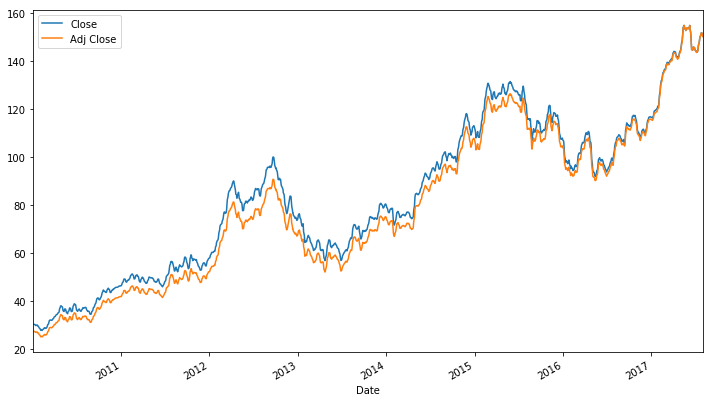

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

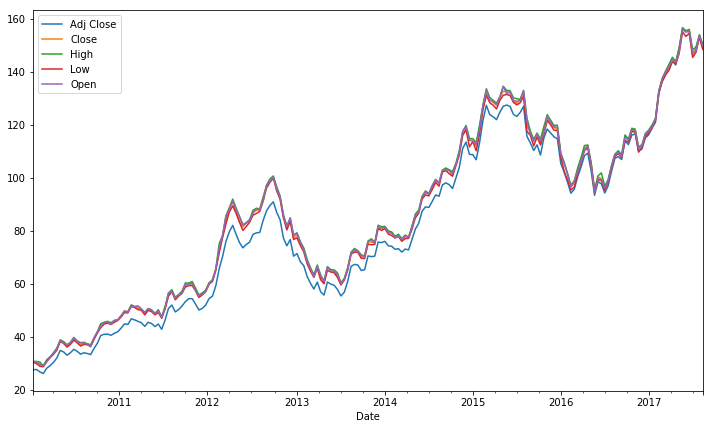

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

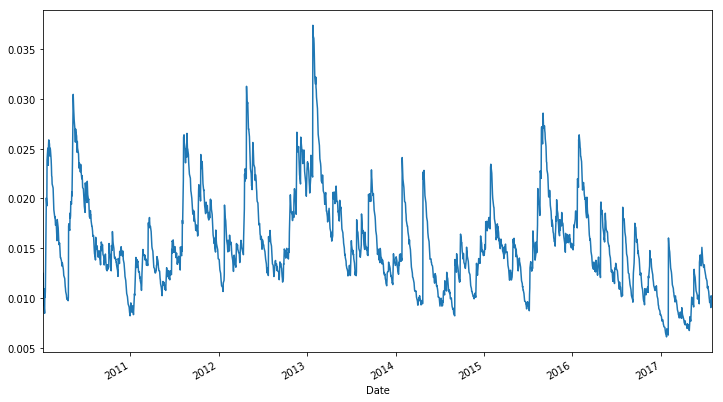

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [137]:
from io import BytesIO
import os
from urllib.parse import urlencode
import requests
import numpy as np
import pandas as pd

def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe."""

    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)

    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)


    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)


    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]


    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = frame['Organic'] == 'Y'
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )


In [139]:
avocados = read_avocadata('2014', '2016')
avocados.head()

<ipython-input-137-1138e1b3f6b7>:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  frame['Variety'].replace(


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


# 2.2 Lab
Para realizar esta parte del laboratorio, se tomaron los datos de https://www.datos.gov.co/Transporte/ACCIDENTES-DE-TRANSITO-DESDE-MARZO-2017-A-DICIEMBR/wacd-xkg8/about_data, donde se DESCRIBE LA CANTIDAD DE ACCIDENTES EN EL MUNICIPIO DE CALARCA DESDE EL AÑO 2017-2022.

In [140]:
#ACCIDENTES DE TRANSITO DESDE MARZO 2017 A DICIEMBRE DE 2022 en Calarca
datos = pd.read_json('https://www.datos.gov.co/resource/wacd-xkg8.json')
datos.head()

,orden,ipat,fecha,a_o,mes,dia,gravedad
0,1,A000057026,2017-03-16T00:00:00.000,2017,3,jueves,CON HERIDOS
1,2,A000057029,2017-03-14T00:00:00.000,2017,3,martes,CON HERIDOS
2,3,A000057030,2017-03-14T00:00:00.000,2017,3,martes,CON HERIDOS
3,4,A000057022,2017-03-14T00:00:00.000,2017,3,martes,SOLO DAÑOS
4,5,A000056976,2017-03-14T00:00:00.000,2017,3,martes,SOLO DAÑOS


In [141]:
datos.dtypes

,0
orden,int64
ipat,object
fecha,object
a_o,int64
mes,int64
dia,object
gravedad,object


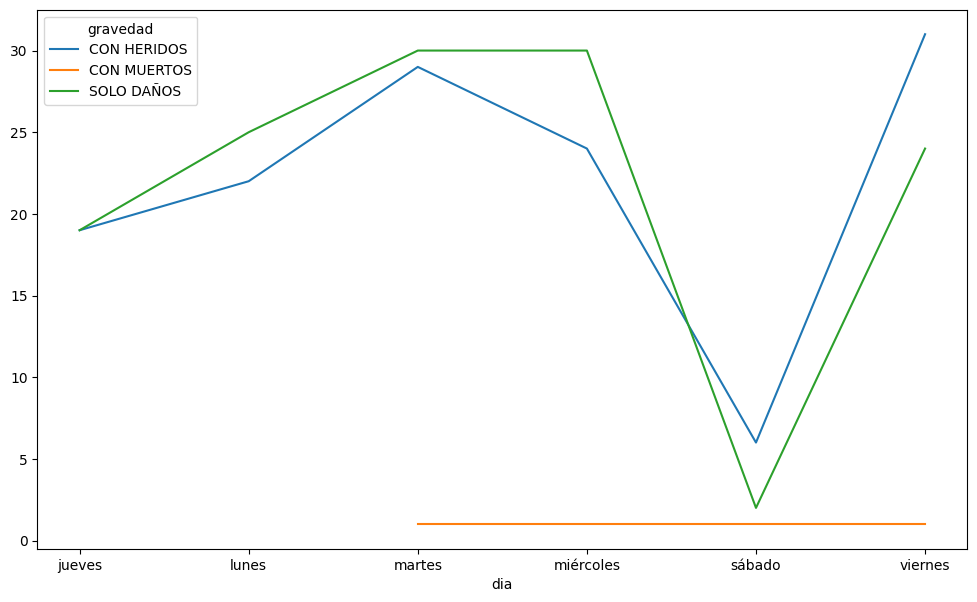

In [147]:
year2017 = datos[datos.a_o == 2017]
year2017.groupby(['dia', 'gravedad'])['orden'].count().unstack().ffill().plot();

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_accidents_by_month_gravity(df):
    """
    Analiza y visualiza la distribución de accidentes por gravedad y mes
    """
    # Convertir el mes a nombre del mes para mejor visualización
    month_names = {
        '1': 'Enero', '2': 'Febrero', '3': 'Marzo', '4': 'Abril',
        '5': 'Mayo', '6': 'Junio', '7': 'Julio', '8': 'Agosto',
        '9': 'Septiembre', '10': 'Octubre', '11': 'Noviembre', '12': 'Diciembre'
    }

    # Crear DataFrame con el conteo
    monthly_gravity = (
        df.groupby(['mes', 'gravedad'])
        .size()
        .reset_index(name='count')
    )

    # Convertir mes a nombre
    monthly_gravity['mes'] = monthly_gravity['mes'].astype(str).map(month_names)

    # Crear el gráfico
    plt.figure(figsize=(15, 8))

    # Usar seaborn para crear un gráfico de barras agrupadas
    sns.barplot(
        data=monthly_gravity,
        x='mes',
        y='count',
        hue='gravedad',
        palette=['#FF9999', '#66B2FF', '#5cff4f']
    )

    plt.title('Distribución de Accidentes por Gravedad y Mes', pad=20)
    plt.xlabel('Mes')
    plt.ylabel('Número de Accidentes')

    plt.xticks(rotation=45)

    plt.legend(title='Gravedad', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.grid(True, axis='y', alpha=0.3)

    plt.tight_layout()

    return plt


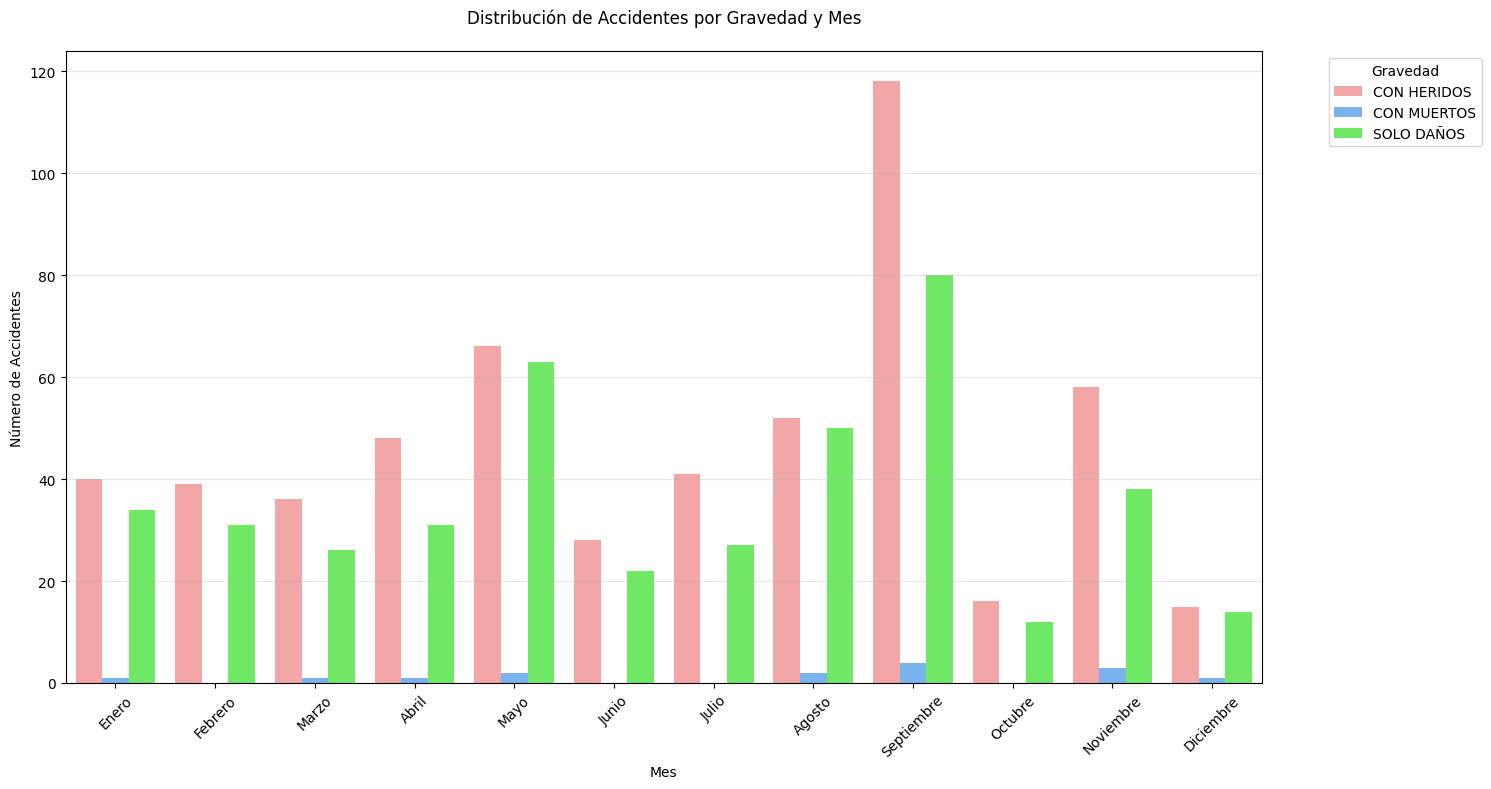

In [158]:
analyze_accidents_by_month_gravity(datos)
plt.show()

In [159]:
accident_correlation = year2017.groupby(['dia', 'gravedad'])['orden'].count().unstack().ffill().corr()
accident_correlation

gravedad,CON HERIDOS,CON MUERTOS,SOLO DAÑOS
gravedad,,,
CON HERIDOS,1.000000,NaN,0.894447
CON MUERTOS,NaN,NaN,NaN
SOLO DAÑOS,0.894447,NaN,1.000000


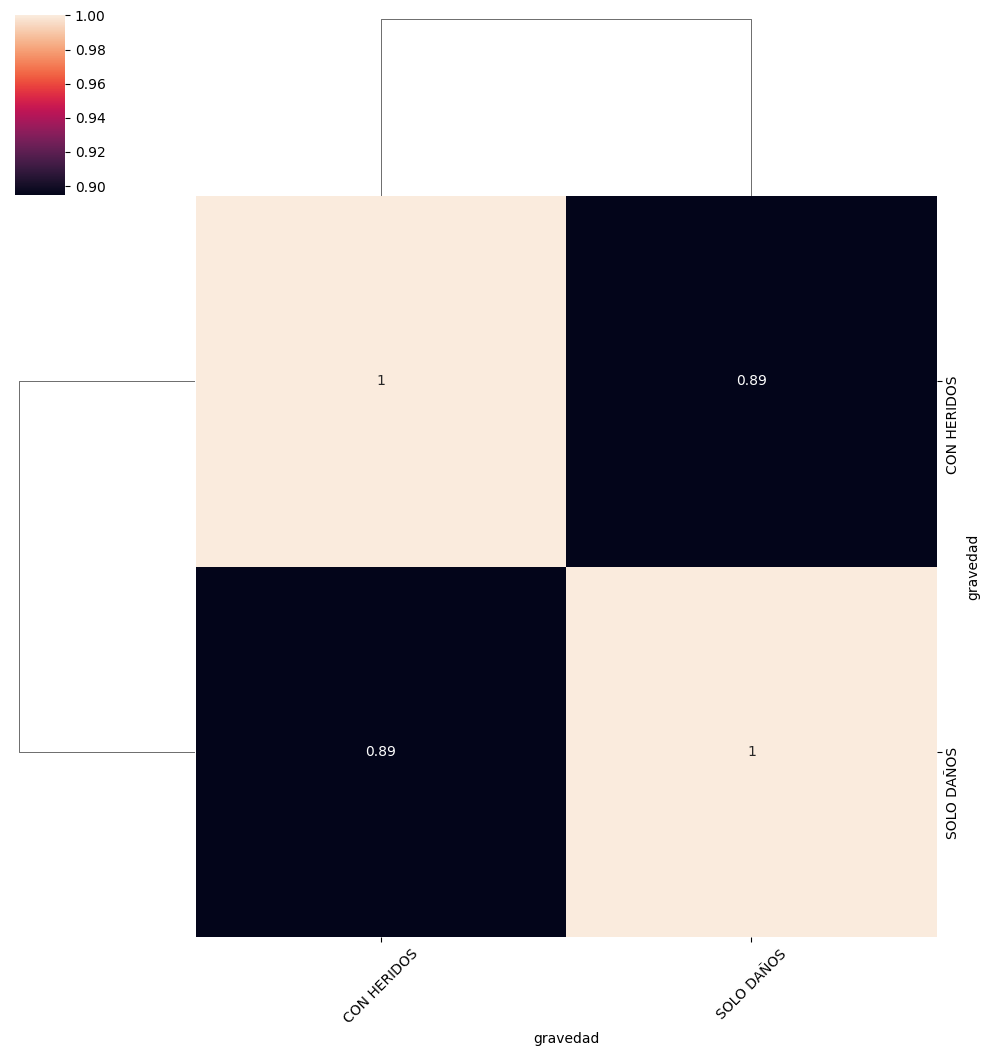

In [161]:
import seaborn as sns
accident_correlation = accident_correlation.replace([np.inf, -np.inf], np.nan)

accident_correlation = accident_correlation.dropna(how='all', axis=0).dropna(how='all', axis=1)

accident_correlation = accident_correlation.fillna(0)

grid = sns.clustermap(accident_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Thanks!